/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 92 (29.77346278317152%)


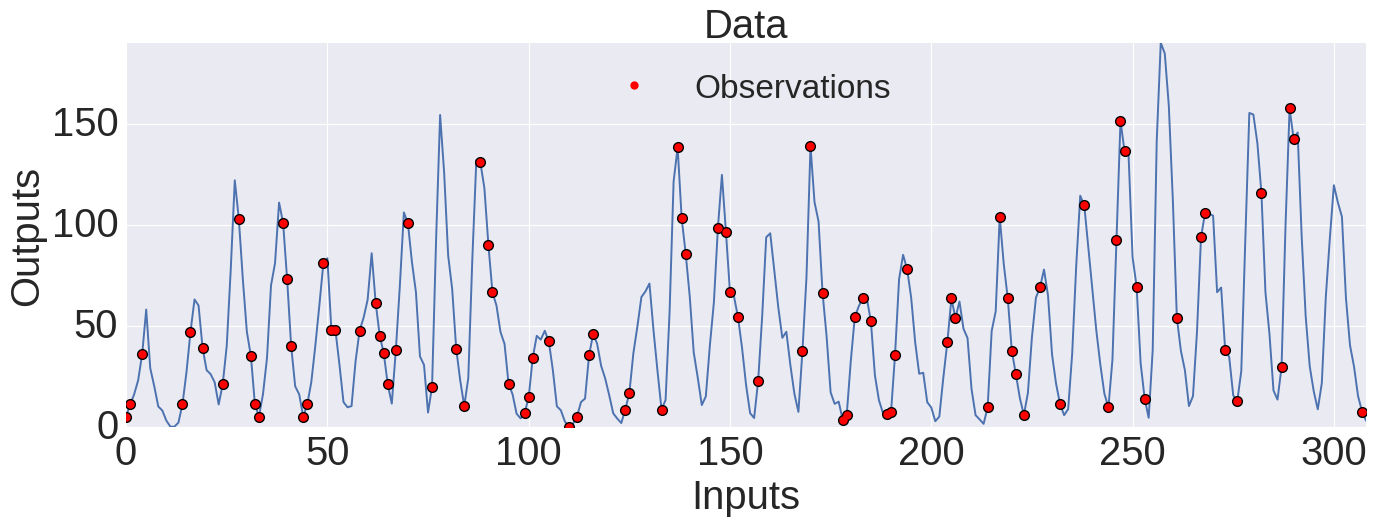

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import theano as th

th.config.warn_float64 = 'raise'

g3.style_big_seaborn()
g3.style_widget()

x, y = g3.data_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.3)

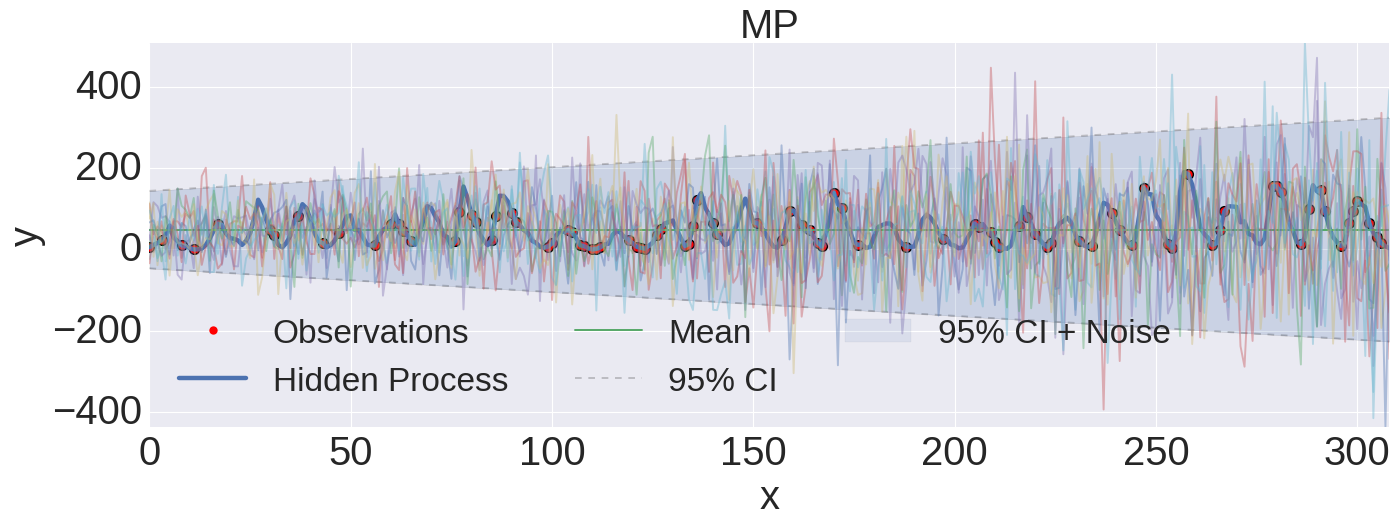

In [6]:
mp = g3.MarginalProcess(x, g3.StudentT(mu=g3.Bias(), sigma=g3.Linear(), nu=g3.Linear(name='nu')), hidden=y)
mp.observed(x_obs, y_obs)
mp.plot(samples=10)

In [8]:
mp.widget(samples=10)

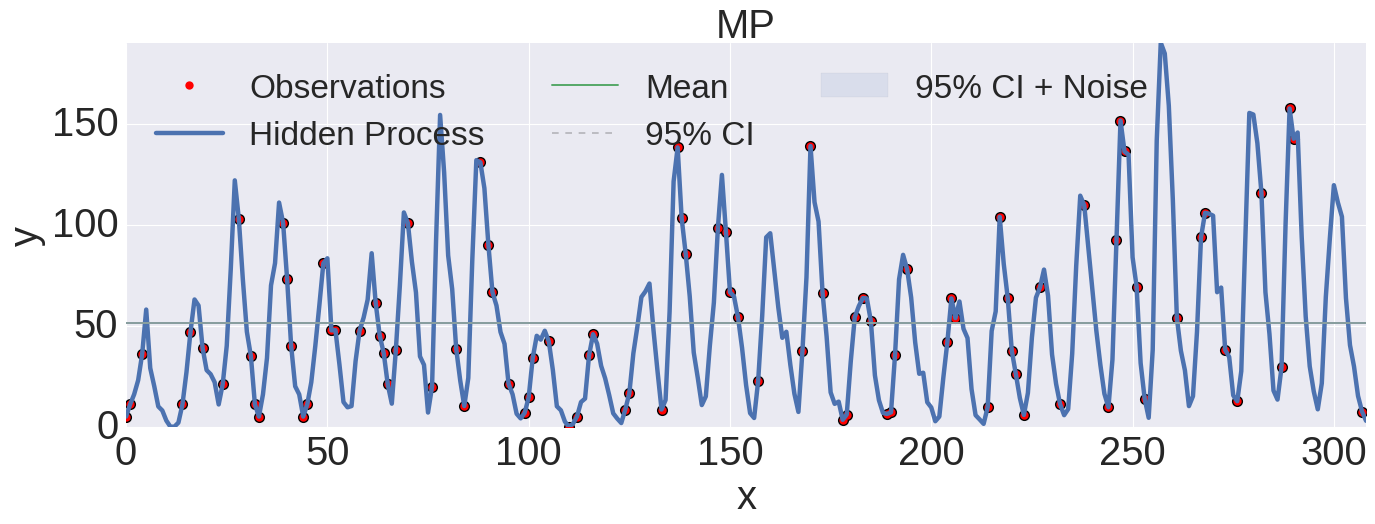

In [2]:
mp = g3.MarginalProcess(x, g3.Uniform(lower=g3.Bias(), upper=g3.Bias(name='upper')), hidden=y)
mp.observed(x_obs, y_obs)
mp.plot(samples=10)

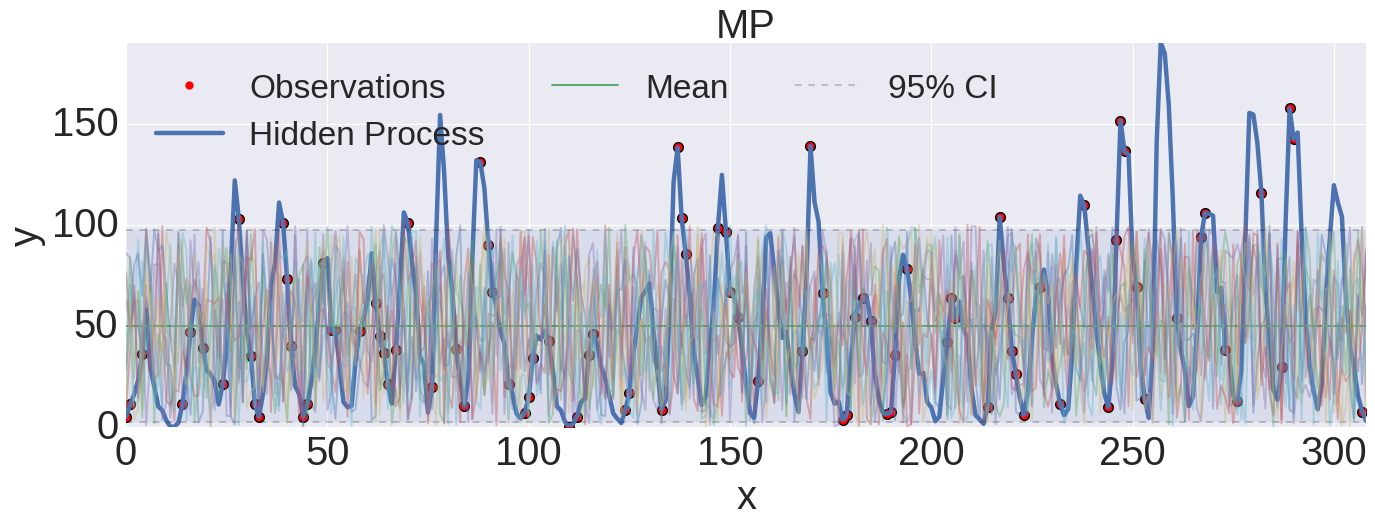

In [7]:
mp.plot(mp.params_widget, quantiles_noise=False, samples=10)

In [4]:
mp.widget()

In [22]:
mp.params_widget

{'MP_Bias_Bias': array(0.0, dtype=float32),
 'MP_upper_Bias': array(100.0, dtype=float32)}

In [2]:
mp = g3.MarginalProcess(x, g3.Normal(mu=g3.Power(n=2), sigma=g3.Power(x, n=2, name='std')), hidden=y)
mp.observed(x_obs, y_obs)

In [22]:
from scipy import stats

In [49]:
stats.norm.rvs(loc=np.zeros(10), scale=np.ones(10), size=(5,10))

array([[-0.64407502,  2.70312086, -1.20489247,  1.29890395, -1.9996191 ,
         0.02033005, -0.53261121, -2.44145991,  0.31513702, -0.69590528],
       [-1.1107666 , -1.16972663, -0.75265244,  0.74946962, -0.42065099,
         1.99873644,  1.1086269 ,  0.04089957, -0.25299528,  1.58001619],
       [-0.08861349,  1.34164085,  3.57475317, -0.1093166 , -0.33100905,
        -0.63079281,  0.23643462,  0.18323881,  1.23359633, -1.22345255],
       [ 0.53346597,  0.23333926, -0.3104518 , -0.43079639,  0.28875328,
        -0.14783849, -0.34003753, -0.86352142,  0.32549317,  0.8631481 ],
       [-1.0149948 ,  1.30519786, -0.44529626,  1.35629423,  1.64860503,
        -0.56553454, -2.4209287 , -0.45051677,  2.23722385, -0.93871643]])

In [103]:
samples = stats.t.rvs(np.array([1,2,3,4,5,6,7,8,9,10]), size=(1000,10))

In [104]:
import seaborn as sb

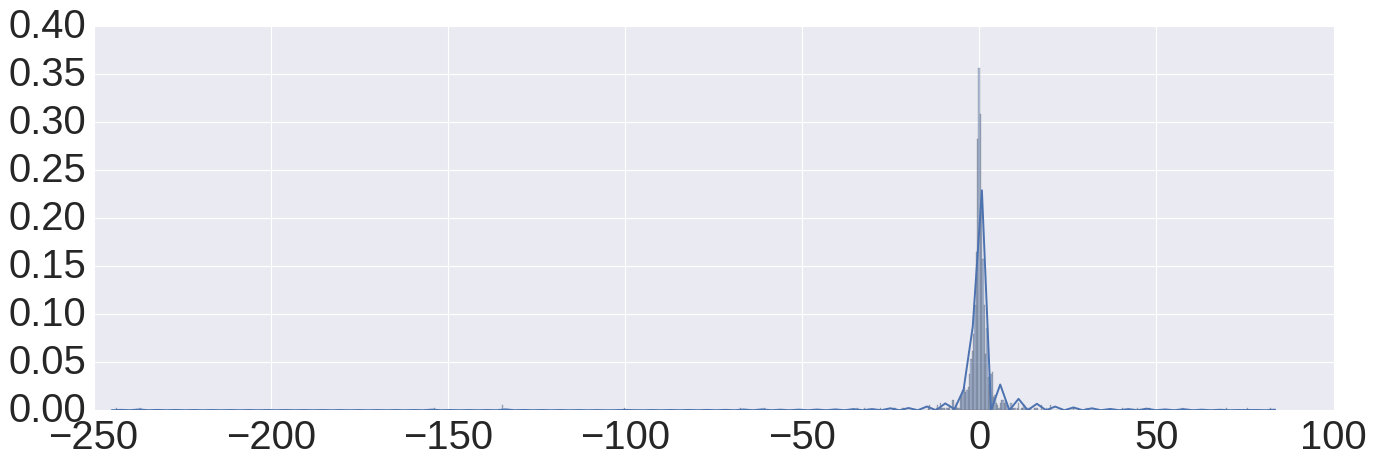

In [106]:
sb.distplot(samples[:, 0], bins='auto')

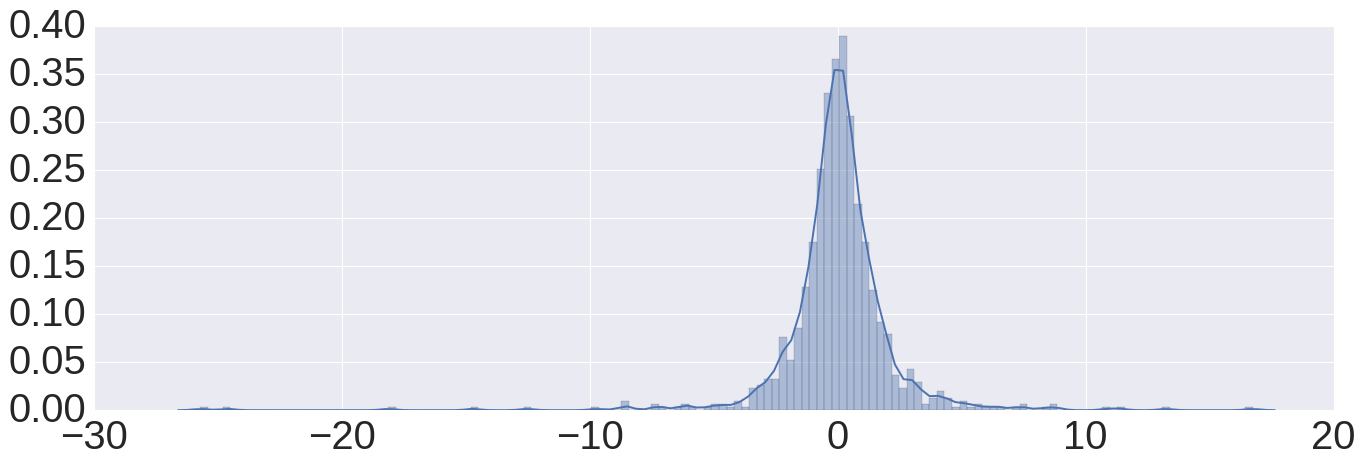

In [110]:
sb.distplot(samples[:, 1], bins='auto')

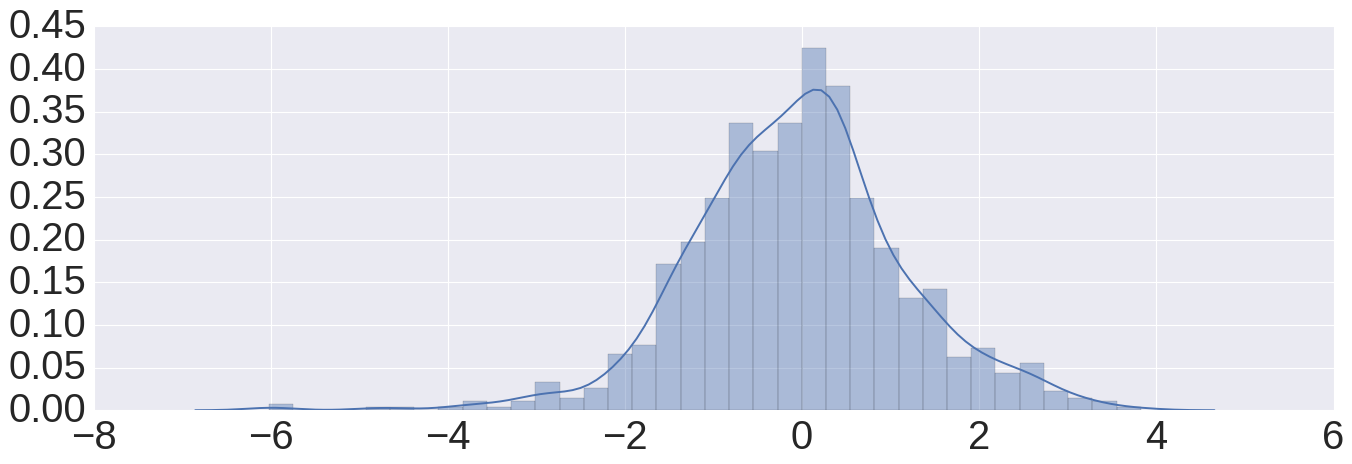

In [107]:
sb.distplot(samples[:, 5], bins='auto')

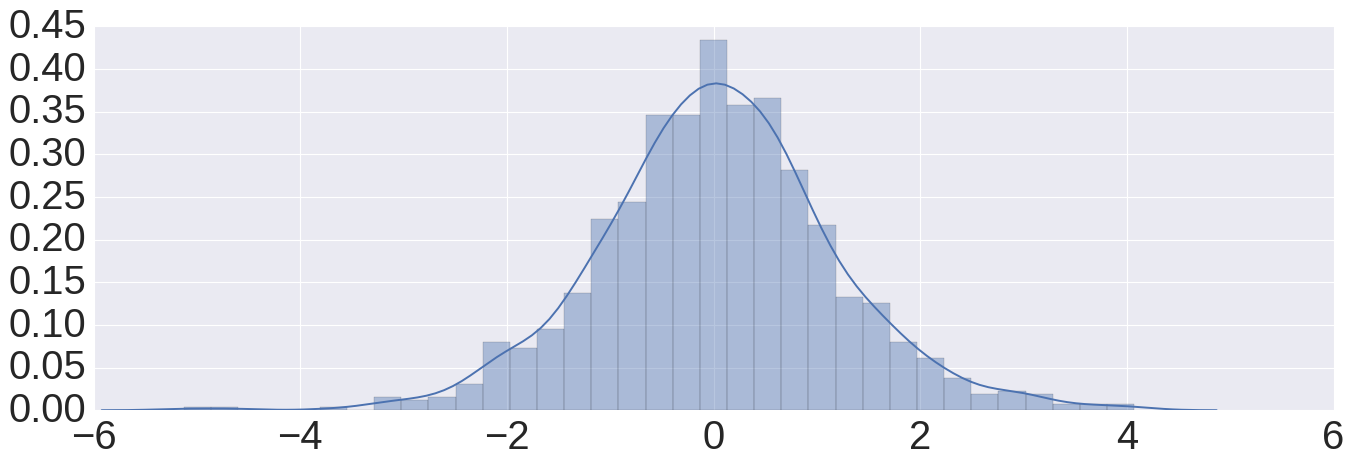

In [109]:
sb.distplot(samples[:, 9], bins='auto')

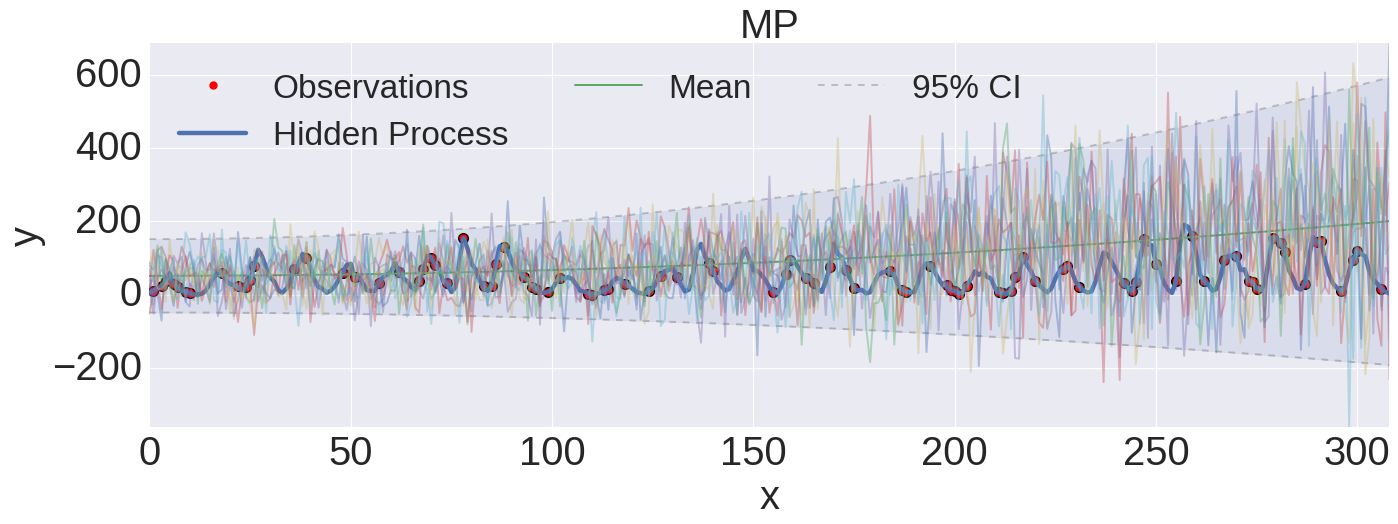

In [56]:
mp.plot(quantiles=True, samples=10, quantiles_noise=False, std=False)

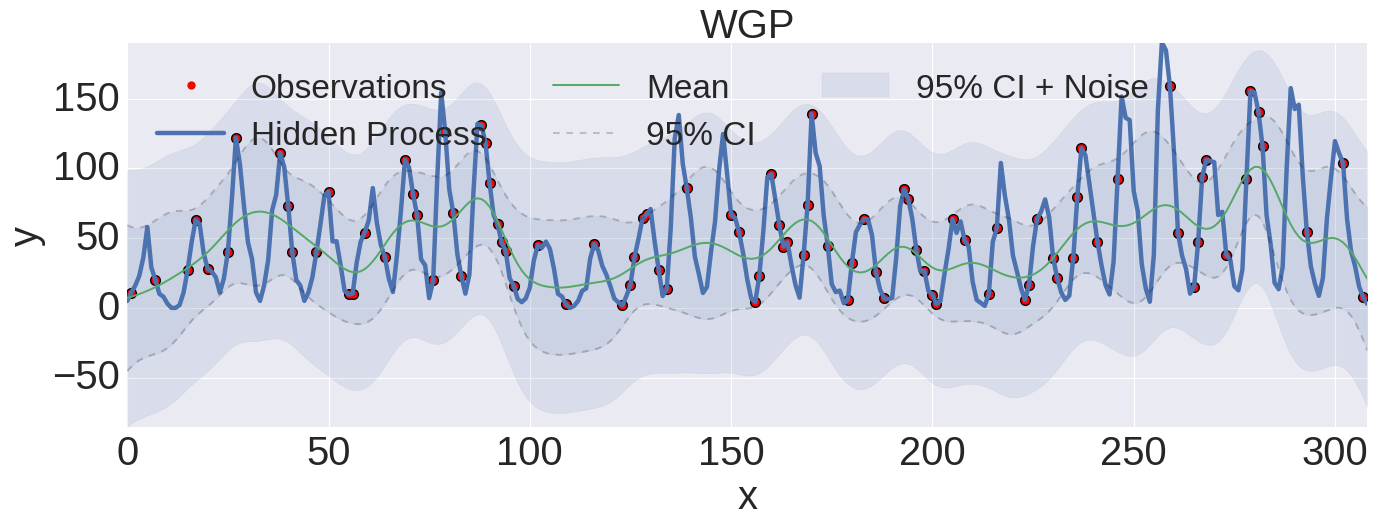

In [4]:
wgp = g3.WarpedGaussianProcess(x, location=g3.Zero(), kernel=g3.SE(x), 
                               mapping=g3.BoxCoxShifted(), hidden=y)
wgp.observed(x_obs, y_obs)
wgp.plot()

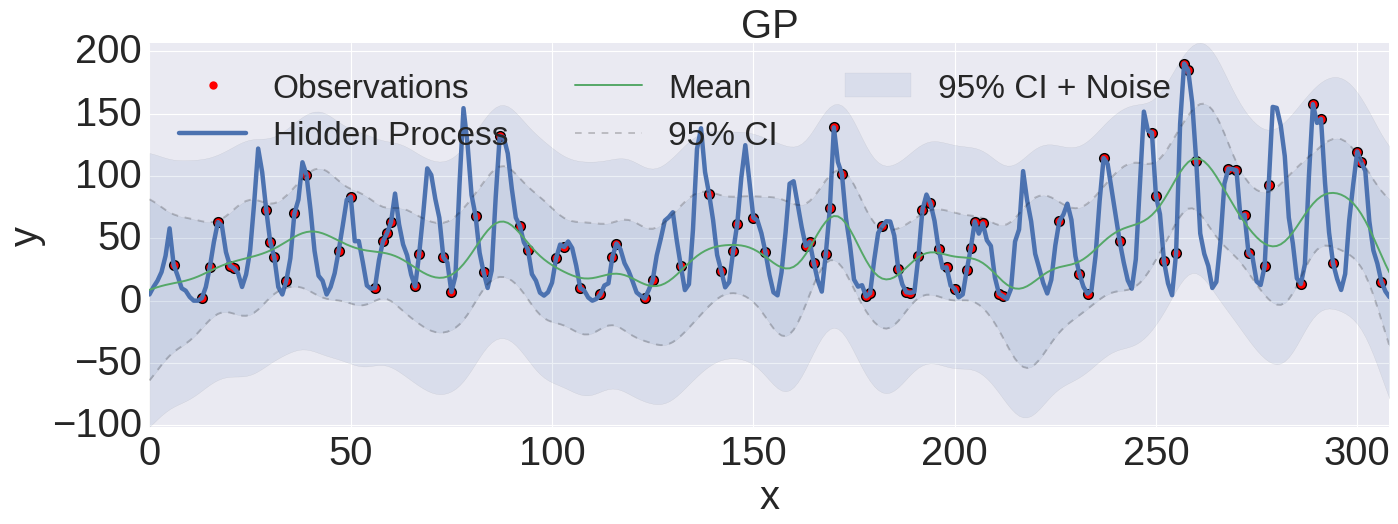

In [43]:
gp = g3.GaussianProcess(x, location=g3.Zero(), kernel=g3.SE(x), hidden=y)
gp.observed(x_obs, y_obs)
gp.plot()

'Starting function value (-logp): 528.178'
'start_bfgs'
         Current function value: 464.526855
         Iterations: 20
         Function evaluations: 114
         Gradient evaluations: 102
'find_MAP'
{'MP_Power_Coeff': array([ 0.0002303], dtype=float32),
 'MP_Power_Constant': array(48.453712463378906, dtype=float32),
 'MP_std_Coeff': array([ 0.00012432], dtype=float32),
 'MP_std_Constant': array(34.05850601196289, dtype=float32)}


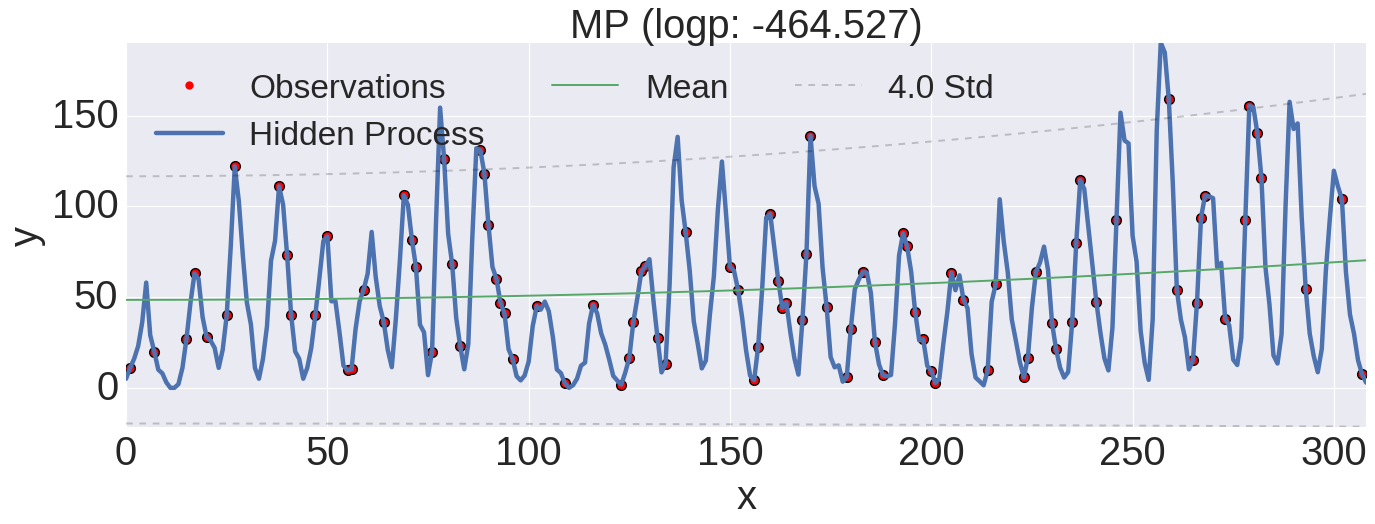

In [28]:
mp.plot(mp.find_MAP(), quantiles=False, quantiles_noise=False, std=True)

In [30]:
mp.widget(mp.find_MAP(), quantiles=False, quantiles_noise=False, std=True)

'Starting function value (-logp): 528.178'
'start_bfgs'
         Current function value: 464.526855
         Iterations: 20
         Function evaluations: 114
         Gradient evaluations: 102
'find_MAP'
{'MP_Power_Coeff': array([ 0.0002303], dtype=float32),
 'MP_Power_Constant': array(48.453712463378906, dtype=float32),
 'MP_std_Coeff': array([ 0.00012432], dtype=float32),
 'MP_std_Constant': array(34.05850601196289, dtype=float32)}


Widget Javascript not detected.  It may not be installed or enabled properly.


In [111]:
mp = g3.MarginalProcess(x, g3.Uniform(lower=g3.Bias(), upper=g3.Bias(name='upper')), hidden=y)
mp.observed(x_obs, y_obs)
mp.plot(quantiles=False, quantiles_noise=False, std=True)

AttributeError: 'Uniform' object has no attribute 'lower'

In [64]:
mp.widget(quantiles=False, quantiles_noise=False, std=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [68]:
mp.logp(mp.params_widget)

array(-488.87384033203125, dtype=float32)

'Starting function value (-logp): 488.874'
'start_bfgs'
         Current function value: 488.873840
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 14
'start_powell'
Optimization terminated successfully.
         Current function value: 481.948242
         Iterations: 3
         Function evaluations: 157
'start_bfgs_powell'
Optimization terminated successfully.
         Current function value: 481.948242
         Iterations: 3
         Function evaluations: 157
'start_powell_bfgs'
         Current function value: 481.948242
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4
'find_MAP'
{'MP_Bias_Bias': array(1.7999578714370728, dtype=float32),
 'MP_upper_Bias': array(190.2000274658203, dtype=float32)}


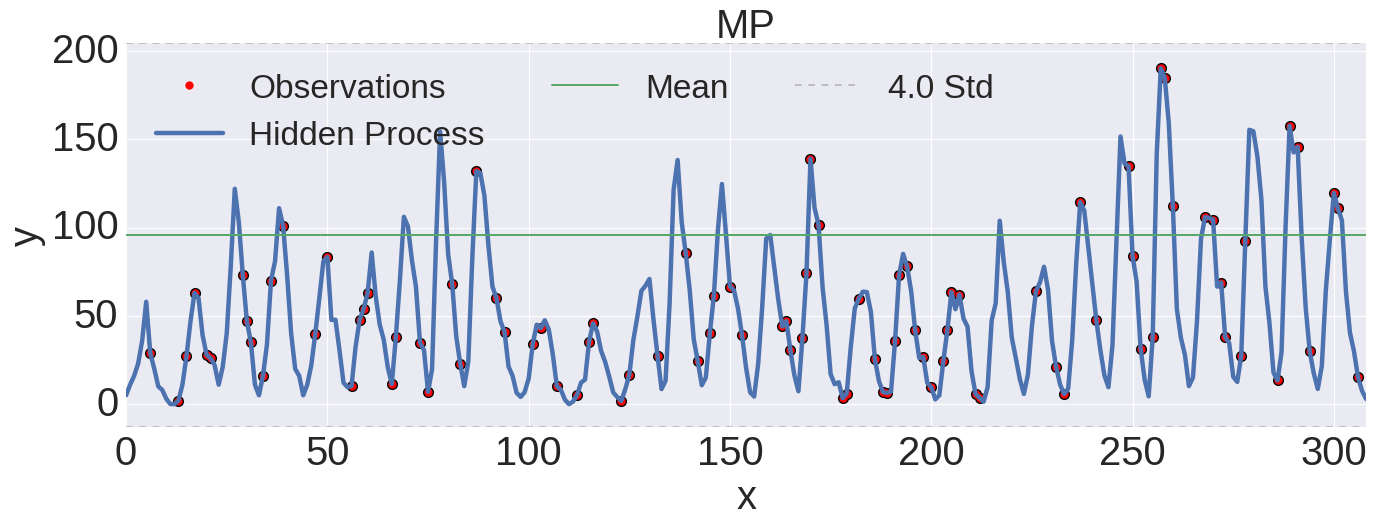

In [72]:
mp.plot(mp.find_MAP(start=mp.params_widget, points=4), quantiles=False, quantiles_noise=False, std=True)

In [30]:
mp = g3.MarginalProcess(x, g3.StudentT(mu=g3.Bias(), sigma=g3.Linear(), nu=g3.Linear(name='nu')), hidden=y)
mp.observed(x_obs, y_obs)
mp.plot(samples=10)

True


AttributeError: 'StudentT' object has no attribute 'th_lower'

'Starting function value (-logp): 516.833'
'start_bfgs'
         Current function value: 466.314270
         Iterations: 14
         Function evaluations: 102
         Gradient evaluations: 90
'start_powell'
Optimization terminated successfully.
         Current function value: 466.311218
         Iterations: 5
         Function evaluations: 558
'start_bfgs_powell'
Optimization terminated successfully.
         Current function value: 465.752441
         Iterations: 3
         Function evaluations: 285
'start_powell_bfgs'
         Current function value: 466.311218
         Iterations: 0
         Function evaluations: 78
         Gradient evaluations: 66
'find_MAP'
{'MP_Bias_Bias': array(45.75927734375, dtype=float32),
 'MP_Linear_Coeff': array([ 0.10433247], dtype=float32),
 'MP_Linear_Constant': array(20.619140625, dtype=float32),
 'MP_nu_Coeff': array([-0.16979924], dtype=float32),
 'MP_nu_Constant': array(55.772987365722656, dtype=float32)}


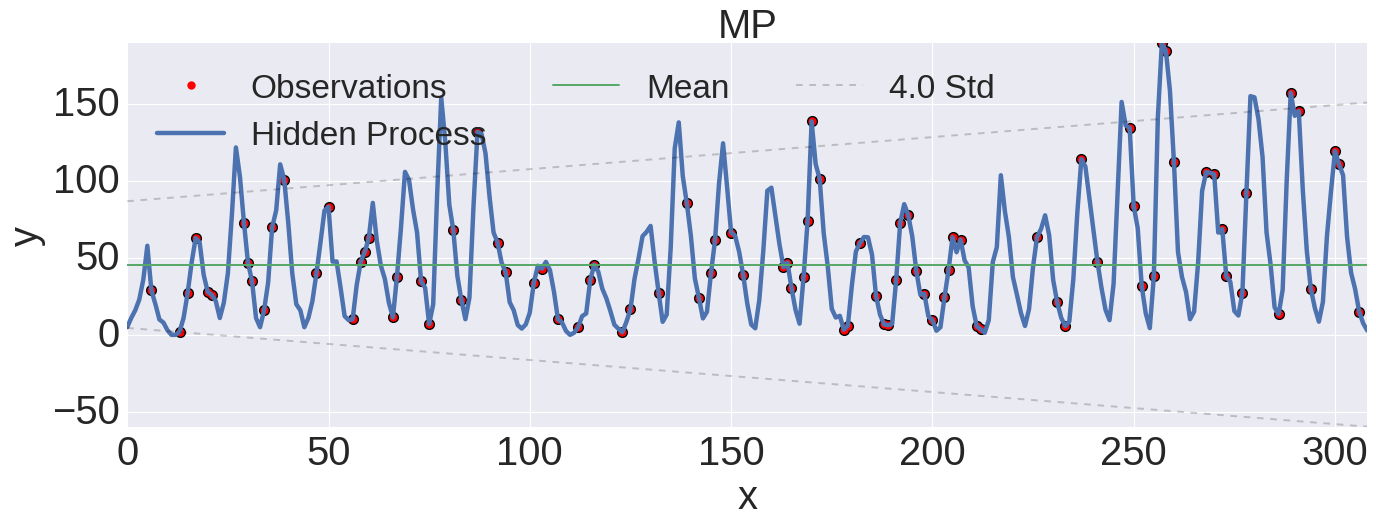

In [79]:
mp.plot(mp.find_MAP(points=4), quantiles=False, quantiles_noise=False, std=True)

In [ ]:
#TODO:
mapping parametric
marginal + mapping
copula